# 混沌與可預報度 hw4 R14229017 葉品辰

<style>
/* === 基礎設定 (地基) === */
.jp-RenderedMarkdown table {
    table-layout: fixed !important;
    width: 100% !important;
    word-break: break-word;
    font-size: 15px; /* 5欄時字體稍微縮小一點會更好讀 */
}

/* === 情境 A：當檢測到表格有「3 個欄位」時 === */
/* 邏輯：選取「既是第一個孩子，又是倒數第三個孩子」的元素 -> 代表總共有3個 */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(3),
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(3) ~ th {
    /* 這裡不用寫 width，下面分開定義 */
}

/* 3欄 - 第 1 欄 (數學) */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(3),
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(3) ~ th:nth-child(1) {
    width: 25% !important;
}
/* 3欄 - 第 2 欄 */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(3) ~ th:nth-child(2) {
    width: 35% !important;
}
/* 3欄 - 第 3 欄 */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(3) ~ th:nth-child(3) {
    width: 40% !important;
}


/* === 情境 B：當檢測到表格有「5 個欄位」時 === */
/* 5欄 - 第 1 欄 (數學 - 窄) */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(5),
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(5) ~ th:nth-child(1) {
    width: 14% !important;
}

/* 5欄 - 第 2 欄 (條件 - 極窄) */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(5) ~ th:nth-child(2) {
    width: 10% !important;
}

/* 5欄 - 第 3 欄 (物理 - 中) */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(5) ~ th:nth-child(3) {
    width: 28% !important;
}

/* 5欄 - 第 4 欄 (類型 - 窄) */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(5) ~ th:nth-child(4) {
    width: 12% !important;
}

/* 5欄 - 第 5 欄 (類比 - 寬) */
.jp-RenderedMarkdown table tr:first-child th:first-child:nth-last-child(5) ~ th:nth-child(5) {
    width: 36% !important;
}
</style>

## Question 1 指紋法


### 0. 核心概念：指紋法 (The Fingerprint Method)

這方法的目標是找出訊號被「最大化放大」且內部變異（雜訊）被「最小化」的空間方向。簡單來說就是 **透過比較「實驗數據」與「控制組（純雜訊）」的變異數結構，來過濾出真正的訊號模式。**

我們可以將整個過程分為三個主要步驟：

#### 第一步：建立數據模型 (Signal-Noise Decomposition)

首先，我們假設實驗數據是由「內部變異（雜訊）」加上一個「確定性的訊號」組成的。

**數學定義：**

假設 $x(t) \in \mathbb{R}^n$ 是一個 $n$ 維空間資訊的時間序列（例如氣候場數據有 $m$ 個時間序列），我們可以寫成：
$$\underset{n \times 1}{x_{\text{exp}}(t)} = \underset{n \times 1}{x_{\text{ctrl}}(t)} + \underset{\text{scalar}}{s(t)} \cdot \underset{n \times 1}{p} \quad (1)$$



**解說：**
這一步是在定義我們的世界觀。

* $x_{\text{exp}}(t)$：我們觀測到的髒數據（含有訊號）。
* $x_{\text{ctrl}}(t)$：純粹的背景雜訊（Internal Variability）。
* $s(t)$：訊號隨時間變化的**振幅**（這是一個純量 scalar，比如越來越強）。
* $p \in \mathbb{R}^n$：訊號的**空間模式**（Spatial pattern，這就是我們要找的「指紋」形狀），真實世界不能直接取得的變數。




#### 第二步：推導變異數矩陣 (Covariance Structure)

我們觀察數據的變異性，變異數矩陣 (Covariance Matrix) 描述了數據在不同空間點上的波動關聯。

**定義：**



$$\underset{n \times n}{C_{\text{ctrl}}}  = E[ x_{\text{ctrl}} x^T_{\text{ctrl}} ] \approx  \frac{1}{m} \underset{(n \times m)}{X_{\text{ctrl}}} \underset{(m \times n)}{X_{\text{ctrl}}^T}$$

$$\underset{n \times n}{C_{\text{exp}} }  = E[x_{\text{exp}}x^T_{\text{exp}} ] \approx  \frac{1}{m} \underset{(n \times m)}{X_{\text{exp}}} \underset{(m \times n)}{X_{\text{exp}}^T}$$


**簡單推導：**
我們將公式 $(1)$ 代入 $C_{\text{exp}}$ 的定義中，來看看會發生什麼事：

$$\begin{aligned}
C_{\text{exp}} &= E[ (x_{\text{ctrl}} + s(t)p) (x_{\text{ctrl}} + s(t)p)^T ] \\
&= E[ (x_{\text{ctrl}} + sp)(x_{\text{ctrl}}^T + p^T s) ] \\
&= E[ x_{\text{ctrl}}x_{\text{ctrl}}^T ] + E[ x_{\text{ctrl}} s p^T ] + E[ s p x_{\text{ctrl}}^T ] + E[ s^2 p p^T ] \\
&= C_{\text{ctrl}} + 0 + 0 +E[ s(t)^2] p p^T
\end{aligned}$$

* 因為雜訊 $x_{\text{ctrl}}$ 與訊號 $s(t)$ 通常假設是不相關的 (uncorrelated)，中間兩項交叉項的期望值為 0。
* 第一項就是 $C_{\text{ctrl}}$。
* 最後一項中，$p$ 是常數向量，提出來剩下 $E[s^2(t)]$。

**結論：**

$$C_{\text{exp}} = C_{\text{ctrl}} + \alpha pp^T, \quad \text{其中 } \alpha = E[ s^2 (t) ]$$

這告訴我們：實驗組的變異數矩陣，等於「控制組變異數」加上「訊號造成的變異」。





#### 第三步：定義指紋矩陣與特徵分解 (Fingerprint Matrix & Eigen-decomposition)

為了分離出訊號我們定義一個指紋矩陣 S。

**定義：**

$$\underset{n \times n}{S} = C_{\text{exp}} C^{-1}_{\text{ctrl}}$$

**解說：**

這個操作在數學上很像「正規化」或「白化」(Whitening)。我們用實驗組的變異 $C_{\text{exp}}$ 去除以（乘以逆矩陣）背景雜訊的變異 $C_{\text{ctrl}}$。

* 如果沒有訊號，$C_{\text{exp}} \approx C_{\text{ctrl}}$，那麼 $S$ 就會接近單位矩陣 $I$。
* 如果有訊號，$S$ 就會凸顯出訊號的方向。

**將剛才的推導代入：**

$$\underset{n \times n}{S} = (C_{\text{ctrl}} + \alpha pp^T) C^{-1}_{\text{ctrl}} = \underset{n \times n}{I} +  \underset{\text{scalar}}{\alpha} \underset{(n \times 1)}{p}\underset{(1 \times n)}{p^T} \underset{(n \times n)}{C^{-1}_{\text{ctrl}}}$$

**特徵分解 (Eigen-decomposition)：**

我們對 S 進行分解：

$$Sv = \lambda v$$

**S 的最大特徵值對應的特徵向量 (Eigenvector)，即為指紋 (Fingerprint)。**
這意味著這個特徵向量會指向訊號模式 $p$ 的方向，因為那是相對於背景雜訊 $C_{\text{ctrl}}$ 來說，能量被放大最多的方向。





#### 實作對應 (Implementation Mapping)在你的 Python 程式碼實作中，上述的數學符號對應如下：

| 數學符號 | 物理意義 | Python 實作對應 (Implementation) |
| --- | --- | --- |
| **$x_{exp}(t)$** | 帶噪訊的實驗數據 | `noise[:,:,:] + signal[:,:,:]` (疊加數據) |
| **$s(t)$** | 線性趨勢 (時間振幅) | `linspace(1, 4, 100)` (隨時間線性增強) |
| **$p$** | 空間訊號模式 | `2nd-order Legendre polynomial` (二階勒讓德多項式) |
| **$x_{ctrl}(t)$** | 內部生成的高斯雜訊 | $\sum_n P_n (x) W_n (t)$ (模擬的背景場) |


#### 總結這個方法的核心邏輯是：

1. **分離：** 認為 數據 = 雜訊 + 訊號。
2. **比較：** 比較「有訊號的變異結構」與「純雜訊的變異結構」。
3. **旋轉：** 透過 $S = C_{\text{exp}} C^{-1}_{\text{ctrl}}$ 的特徵分解，找出一個特殊的空間方向（特徵向量）。這個方向能讓訊號相對於雜訊的比例 (Signal-to-Noise Ratio) 達到最大，這個方向就是我們尋找的**指紋**。


### 1.  選一組 $s(t)$ , $p$, or $x_{\text{ctrl}}(t)$ 

改變時間 $s(t)$ 從「暖化」變成「週期循環」，原本直線上升是在模擬全球暖化，但地球氣候充滿了週期性變化像是季節循環、ENSO、IPO、PPO，信號不是一直增加而是有週期性的變化。

令 $s(t) = A \sin(\omega t + \phi)$ ，其中 $ A = 3 , \omega = \frac{2\pi}{200}, \phi= \frac{\pi}{7}$ ，由於 $t \in [0,1000]$ 所以會有5個時間週期，經過測試不同的相角差 $\phi$ 並沒有顯著差異，主要差異落在振幅 $A$ 和相頻 $\omega$，人類並沒有對於更長時間尺度的IPO、PPO的觀測資料故選擇很小的相頻，但同時希望有點解果所以讓振幅大一點。




### 2. fingerprint method 看到的空間結構

![](pic/Q1.png)

黑色是訊號、藍色是訊號+雜訊、紅色是訊號+雜訊經過fingerprint method提訊降噪後的結果。

因為數據量可以自行設定所以我設定較少使得整個流程不用做EOF等降維手段也能夠有很不錯的結果。(紅色與訊號非常相似)

## Question 2 讀paper

### 1. Sen Zhao 2019

$$\frac{dT}{dt} = -\lambda(t)T(t) + \alpha(t)T_{\text{ENSO}}(t) + \sigma_0 \xi(t) \quad (2)$$

$$\frac{d\xi}{dt} = -m\xi(t) + w(t) \quad (3)$$


#### (a) 特徵時間尺度

1. Sen2019 的模型本質上是一個一階線性非齊次常微分方程，暫時忽略隨機項和參數的時間變化看最基本的形式，$\lambda$ 是阻尼係數：

    $$\frac{dT}{dt} = -\lambda T + F(t)$$

    可以得解：

    $$\begin{aligned}
    \frac{dT}{dt} &= -\lambda T + F(t) \\
    e^{\lambda t}\frac{dT}{dt} + \lambda e^{\lambda t} T &= F(t)e^{\lambda t}\\
    \frac{d}{dt} [ T(t) e^{\lambda t} ] &= F(t)e^{\lambda t} \\
    \left[ T(t') e^{\lambda t'} \right]_{0}^{t}&=\int_{0}^{t} F(t')e^{\lambda t'} dt'  \\
    T(t)e^{\lambda t} - T(0)e^{\lambda \cdot 0} &=\int_{0}^{t} F(t')e^{\lambda t'} dt' \\
    T(t) &= e^{-\lambda t} \left( \int_{0}^{t} F(t')e^{\lambda t'} dt' + T(0) \right) \\
    T(t) &= \underbrace{e^{-\lambda t} \int_{0}^{t} F(t')e^{\lambda t'} dt'}_{\text{Forced Response}} + \underbrace{T(0)e^{-\lambda t}}_{\text{Transient Response}}
    \end{aligned}$$

    **物理意義：**

    * 系統現在的狀態 $T(t)$是過去所有外力 $F(t')$ 的加權總和，在Sen2019 的模型就是在不同季節 $T_{\text{ENSO}}$的加權總合。
    * 權重 $e^{-\lambda(t-t')}$ 告訴我們：越久以前的外力，對現在的影響越小。
    * 這個「遺忘」的速度就是由系統本身的特徵時間 $\tau = \frac{1}{\lambda}$ 決定的。

2. Hw1 Question3.3 的二階震盪系統
   
   
    $$
    \frac{d^2x}{dt^2} + 9x = k \sin(\frac{t}{k}),\quad k \in \mathbb{R}^+
    ,x(0)=0,x'(0)=1
    $$
    
    可用Laplace transform得解

    $$
    \begin{aligned}
    \frac{d^2x}{dt^2} + 9x &= k \sin(\frac{t}{k}) \\
    \mathcal{L}[x''] + 9 \mathcal{L}[x] &= k \mathcal{L}[\sin(\frac{t}{k})] \\
    s( sX(s) -  x(0)) - x'(0)+ 9 X(s)&= k \cdot \frac{1/k}{s^2 + (1/k)^2} \\
    s^2 X(s) - 1 + 9 X(s) &= \frac{1}{s^2 + 1/k^2} \\
    X(s) &= \frac{1}{s^2 + 9} + \frac{1}{(s^2+9)(s^2 + 1/k^2)} \\
    X(s) &= \frac{1}{s^2 + 9} + \frac{-k^2}{9k^2-1}\frac{1}{3}\frac{3}{(s^2+9)}+\frac{k^2}{9k^2-1}k\frac{1/k}{(s^2 + 1/k^2)} \\
    x(t) &= \underbrace{\frac{1}{3} \sin(3t)}_{\text{homogeneous from IC}} +
    \underbrace{\frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})}_{\text{forced response term}}
    \end{aligned}
    $$

 
    **Dominant term：**

    * Homogeneous solution 的頻率 $\omega_{\text{hom}} = 3 \Rightarrow \tau_{\text{hom}} = \frac{1}{3}$
    * Forcing 的頻率 $\omega_{\text{forcing}} = \frac{1}{k} \Rightarrow \tau_{\text{forcing}} = k$
    * Forcing 碰到系統的響應頻率 $\omega_{\text{system}} = 3 \Rightarrow \tau_{\text{system}} = \frac{1}{3}$

    **Dominant term頻率分段討論：**

    1. **Slow forcing:** $k \gg \frac{1}{3} $ → 以系統的自然震盪頻率為主$\tau \approx \frac{1}{3}$ characteristic time是 $\frac{1}{3}$ ， $x(t)$ 會緩慢隨時間增長，在極慢的時間尺度 $\tau \approx k$：這是整個波型緩慢上下起伏的背景趨勢（近似成直線）

    $$
    \begin{aligned}
    &\lim_{k \gg 1/3}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})] \\
    =&\lim_{k \gg 1/3}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2}\sin(3t)+\frac{k^3}{9k^2}\sin(\frac{t}{k})] \\
    = & \frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-1}{9}\sin(3t)+ \underset{\tau \approx k}{\frac{1}{9}t}
    \end{aligned}
    $$

    2. **Fast forcing:** $k \ll \frac{1}{3}$ → 以系統的自然震盪頻率為主$\tau \approx \frac{1}{3}$ characteristic time是 $\frac{1}{3}$

    $$
    \begin{aligned}
    &\lim_{k \to 0}[\frac{1}{3} \sin(3t)+ \frac{1}{3}\frac{-k^2}{9k^2-1}\sin(3t)+\frac{k^3}{9k^2-1}\sin(\frac{t}{k})] \\
    = & \frac{1}{3} \sin(3t)+ 0
    \end{aligned}
    $$

    3. **Resonance:**  $k \approx \frac{1}{3}$ → 外力的頻率和系統的自然震盪頻率接近→ 共振(震幅變無限大) → characteristic time 會接近 $\frac{1}{3}$
   
    **Sen2019 的模型和Hw1 Question3.3比較：**


    |   | Hw1 Q3.3 (振盪器) | Sen2019 SDM (衰減器)忽略隨機項 |
    | --- | --- | --- |
    | **系統階數** | **二階 (慣性系統)** | **一階 (無慣性系統)** |
    | **內部行為** | 即使沒有外力，系統也會**振盪**（有自己的週期 $2\pi/3$） | 若沒有外力，系統只會**指數衰減**回零（單調趨近平衡），不會振盪 |
    | **特徵時間的混合** | 會發生**頻率混合**，如果外力頻率與自然頻率不同能看到兩個頻率的疊加 | 主要是**頻率跟隨**，因為是過阻尼系統傾向於直接跟隨外力變化，稍微帶點滯後由 $1/\lambda$ 決定。 |
    | **共振現象** | **有**，當外力頻率 $\tau_{\text{forcing}} \approx 3$ 時，響應無限大 | **無**，一階系統不會發生頻率共振但它有季節性放大的概念，這在 Sen2019 中被稱為 C-mode 。|
    | **時間尺度的層次** | 外力 $k$ 改變的是振盪的快慢。 | 外力 (ENSO) 提供的是**長記憶**。IOD 本身記憶短但因為「搭上了」ENSO 這班長程列車，所以看起來好像有了長期的可預報性 |

   
    **帶回Sen2019的數值：**

    $$
    \begin{aligned}
    \lambda(t) &= \lambda_0 [1 + D \cos(\omega t + \phi_D)] \\
    &= 0.35 [1 + 0.84 \cos(\frac{\pi}{6} t - 0.63)]
    \end{aligned}
    $$

    $$
    \begin{aligned}
    \alpha(t) &= \alpha_0 [1 + A \cos(\omega t + \phi_A)] \\
    &= 0.043 [1 + 3.04 \cos(\frac{\pi}{6} t + 2.37)]
    \end{aligned}
    $$


    $$T(t) = \underbrace{T(0)e^{-\lambda t}}_{\text{內部記憶}} + \underbrace{e^{-\lambda t} \int_{0}^{t} \alpha(t') T_{\text{ENSO}}(t') e^{\lambda t'} dt'}_{\text{外力強迫}}$$

    根據 Supplement Table S1 的實際數值：平均阻尼率 $\lambda_0 \approx 0.35 \text{ month}^{-1}$。特徵衰減時間 (e-folding time) $\tau = \frac{1}{\lambda} \approx \mathbf{2.86}$ 個月，這告訴我們一個關鍵的大約 3 個月是IOD的記憶上限。


    | month  | $\lambda$ |  $\frac{1}{\lambda} [\text{month}]$ |$e^{-\lambda 1}$ (1個月後剩餘記憶量) |$e^{-\lambda 3}$ (3個月後剩餘記憶量)|
    |---|---|---|---|---|
    | 1 | 0.642 | 1.557 | 0.526 | 0.146 |
    | 2 | 0.619 | 1.616 | 0.539 | 0.156 |
    | 3 | 0.523 | 1.911 | 0.593 | 0.208 |
    | 4 | 0.381 | 2.623 | 0.683 | 0.319 |
    | 5 | 0.231 | 4.331 | 0.794 | 0.5 |
    | 6 | 0.112 | 8.894 | 0.894 | 0.714 |
    | 7 | 0.058 | 17.342 | 0.944 | 0.841 |
    | 8 | 0.081 | 12.313 | 0.922 | 0.784 |
    | 9 | 0.177 | 5.656 | 0.838 | 0.588 |
    | 10 | 0.319 | 3.137 | 0.727 | 0.384 |
    | 11 | 0.469 | 2.132 | 0.626 | 0.245 |
    | 12 | 0.588 | 1.702 | 0.556 | 0.172 |

    
    ![](pic/Q2_1.png)

    看到 JJA 預報的很好其實不是ENSO做得多好，而是當時IOD的記憶本來就很久遠：
    * 在這個時期的短期預報 $e^{-\lambda t} \approx 0.9$ 的數值還很大，預報的準確度主要來自於我們準確知道了初始條件 $T(0)$ 不管有沒有外力ENSO只要初始水溫量得準近期預報就會準。
    * 在這個時期的長期預報 $e^{-\lambda t} \approx 0.75$ 的數值還也不算小，還記得 $75\%$ 的IOD

    所以真的由完美ENSO改善的預報會在JJA預報6個月後出現，因為 $e^{-\lambda 6} \approx 0.6$ 忘了一半，還有其他月份預報3個月只記得自己的 $20\%$ ，這些會因為ENSO而很大程度改善IOD的預報。在記憶項大約為 $0$ 的基礎下可以得到 Lead > 3 個月後，SDM-P 的好預報完全是由 ENSO 所貢獻的。
    
    $$T(t) \approx \text{Forcing Term}(\text{ENSO})$$

    * 此時 IOD 的變化節奏已經不再是它自己的 $e^{-\lambda t}$，而是完全跟隨 $T_{\text{ENSO}}(t)$ 的節奏在走。
    * 耦合強度 $\alpha(t)$ 是有季節性的：在(SON)秋季 　$\alpha(t)T_{\text{ENSO}}(t)$ 最大。(MAM)春季  $\alpha(t)T_{\text{ENSO}}(t)$ 很小，外力無法控制系統而內部記憶又已經衰減光了所以ACC很低。





#### (b) 各項貢獻

    
**Hw3 到 Sen2019**

Sen2019 的方程式 (3) 完全對應這個結構，這在物理上稱為 Ornstein-Uhlenbeck (OU) 過程也就是俗稱的Red Noise。

$$
\begin{aligned}
dX &= \Phi(X,t)dt + \sigma dB_t \\
\frac{dX}{dt} &= \Phi(X,t)+ \text{Noise}\\
\frac{d\xi}{dt} &= \underbrace{-m\xi(t)}_{\text{確定性流}} + \underbrace{w(t)}_{\text{隨機擴散}} 
\end{aligned}
$$

1. 方程式 (3)：紅噪音 $\xi$ 的行為：

   產生「有記憶的噪音」的過程

   $$\frac{d\xi}{dt} = \underbrace{-m\xi(t)}_{\text{Term A}} + \underbrace{w(t)}_{\text{Term B}}$$

   * Term A：$-m\xi(t)$
        
        * 當 $\xi$ 變大時這一項會變負，把 $\xi$ 拉回 0；當 $\xi$ 為負時這一項變正，把 $\xi$ 推去 0
        * 特徵時間： $\frac{1}{m}$ 是這個噪音的「記憶時間」，在這段時間內 $\xi$ 會記得它原本的狀態

   * Term B：$w(t)$

        * 這是高斯白噪音每一瞬間都在隨機擾動系統，如果沒有這一項 $\xi$ 會因為 Term A 直接衰減到 0，因為 Term B 不斷地給予隨機能量 Term A 不斷地消耗能量，兩者達到統計平衡使得 $\xi$ 維持一個穩定的高斯的機率分佈。


2. 方程式 (2)：IOD 指數 $T$ 的行為：
   
   這是一個被「雙重驅動」的系統：**確定性的 ENSO** 和 **隨機性的紅噪音**
   
   $$\frac{dT}{dt} = \underbrace{-\lambda(t)T(t)}_{\text{Term 1}} + \underbrace{\alpha(t)T_{ENSO}(t)}_{\text{Term 2}} + \underbrace{\sigma_0 \xi(t)}_{\text{Term 3}}$$

   * Term A：$-\lambda(t)T(t)$
        
        * 當 $T$ 變大時這一項會變負，把 $T$ 拉回 0；當 $T$ 為負時這一項變正，把 $T$ 推去 0，是將 $T$ 拉回氣候平均態的項
        * $\lambda(t)$ 隨季節變化導致 IOD 在冬季容易自我成長，在夏季記憶迅速消失。

   * Term B：$\alpha(t)T_{\text{ENSO}}(t)$

        * IOD 的主要能量來源之一，由於 $T_{\text{ENSO}}$ 變化很慢（年際尺度），它賦予了 $T$ 低頻的可預報性(提供長前置時間 [3~9個月] 的預報能力)。
        * 當 $\alpha(t)T_{\text{ENSO}}$ 在秋季變大時， $T$ 的行為會被這個項「綁架」，跟隨 ENSO 的節奏。

   * Term C： $\sigma_0 \xi(t)$
        
        * 代表了那些與 ENSO 無關的大氣/海洋隨機擾動，即使沒有 ENSO 這一項也能透過隨機共振或單純的累積激發出獨立的 IOD 事件
        * 限制了預報的上限

   ![](pic/Q2_1_2.png)

   對於Sen2019 fig1(a)

   * 0-4 個月（滑梯段）：所有模型（黑線、橘線、紅線）都快速下降內部記憶衰減 ($T(0)e^{-\lambda t}$)
   * 4-9 個月（水平段）：
        * SDM-Z (橘線, Zero Forcing)： 就像溜滑梯一樣直接溜到底（接近 0），這證明了如果沒有外力的話 IOD 自己的記憶在 6 個月後就死透了
        * SDM-P (紅線, Perfect ENSO)： 它沒有掉到底，而是卡在 0.5 左右變成水平線。
        * 結論： 這條水平線證明了 IOD 已經被 ENSO 同化，這時候的預報能力 (ACC $\approx$ 0.5) 完全來自於 ENSO 的訊號。
   
   對於Sen2019 fig1(b)

   * SDM-P (紅實線)和SDM-F-F (綠虛線)的誤差是因為 CFSv2 報錯了 ENSO 導致透過 $\alpha(t)$ 傳遞給 IOD 的訊號也是錯的，從而增加了 IOD 的預報誤差。
   * 如果這個世界只有「內部記憶」和「ENSO」，那使用了完美資訊的 SDM-P理論上 RMSE 應該要接近 0 ，但紅線在 6-9 個月後穩定在 $0.35 \text{K}$ 左右（而不是 0）
        * 0.35 K 的殘留誤差是Red Noise ($\xi$)
        * IOD 還有很大一部分（約 $68\%$ 的變異量）是由不可預測的Red Noise控制的。(但是占比能量應該要大約等於真實發生事件吧 :0 )

        $$\frac{\sigma_{noise}^2}{\sigma_{total}^2} \approx 0.68$$

        * 一個瘋狂的想法是將持續法當作total，就會得到跟作者一樣的結論
        
        $$\frac{\sigma_{noise}^2}{\sigma_{persistence}^2} \approx 0.34$$

        ![](pic/Q2_1_3.png)

        但其實考慮持續法變異度跟Red noise變異度的比值沒有太大的意義，但是數值很接近作者想講的 **三分之一由非ENSO事件所驅動的IOD事件** ，可以透過這種方式驗證只是單純的巧合，對於持續法的誤差:

        $$
        \begin{aligned}
        \sigma_{\text{persistence}}^2=MSE_{\text{persistence}} =& E[(\text{預報} - \text{觀測})^2] = E[(T(t) - T(t+\tau))^2] \\
        =& E[T(t)^2] + E[T(t+\tau)^2] - 2E[T(t)T(t+\tau)] \\
        =& \sigma_{\text{total}}^2 + \sigma_{\text{total}}^2 - 0 \\
        =& 2\sigma_{\text{total}}^2
        \end{aligned}
        $$

        帶回原本的式子就可以得到

        $$ 
        0.34 \approx \frac{\sigma_{\text{noise}}^2}{\sigma_{\text{persistence}}^2} = \frac{\sigma_{\text{noise}}^2}{2 \sigma_{\text{total}}^2} \approx 0.34 
        $$

        所以只能說是巧合 :3



### 2. Ting Liu 2021

#### 先備知識 [課堂] (郭叡如果太忙改的時候可以跳過 :D)

在week9的課程中我們 ~~可能~~ 學到 **如何在數學上「客觀且一致」地定義可預報度** 

* 背景： 我們通常認為當「預報的機率分佈 (Forecast PDF)」與「氣候的機率分佈 (Climatological PDF)」無法區分時，就達到了可預報度的極限
* 難點： 區分兩個機率分佈差異的方法有很多（例如 t-score, z-score），但傳統方法（如均方誤差 MSE）依賴於座標系的選擇且無法反映機率守恆
* 目標： 尋找一種指標， **既能衡量預報與氣候的差異** 又 **不受變數線性或非線性轉換的影響** ，並能幫我們找出動力系統中「最可預報的特徵 (Most predictable feature)」

我們從 **資訊理論** 的視角，而非僅僅依賴傳統的誤差統計來看

*  不變性 (Invariance)： 它提出的指標（如 $R_\theta$ 和 $P_\theta$）對於狀態的線性甚至非線性轉換具有「不變性」。說明無論你用什麼單位或座標來描述系統，這些指標計算出的可預報度極限都是一樣的。

   * 簡單證明：證明相對熵 (Relative Entropy, $R_\theta$) 在非線性可逆轉換 $y = g(x)$ 下，數值保持不變。也就是證明 $R_\theta(X) = R_\theta(Y)$。

        $R_\theta$ (Kullback-Leibler Divergence) 的定義，它是衡量預報分佈 $p(x)$ 與氣候分佈 $q(x)$ 差異的指標：
        
        $$R_\theta(X) \overset{\text{def}}{=} \int p(x) \ln\left(\frac{p(x)}{q(x)}\right) dx$$

        假設我們對系統做了一個非線性轉換 $y = g(x)$（例如 $y = x^3$ 或 $y = e^x$）根據機率守恆定律，機率密度函數 (PDF) 的變換規則包含一個 Jacobian (雅可比行列式) 項：

        $$p_Y(y) = p_X(x) \left| \frac{dx}{dy} \right|$$

        $$q_Y(y) = q_X(x) \left| \frac{dx}{dy} \right|$$

        現在我們在新座標 $y$ 下寫出相對熵：
        
        $$
        \begin{aligned}
        R_\theta(Y) =& \int p_Y(y) \ln\left(\frac{p_Y(y)}{q_Y(y)}\right) dy \\
        =& \int \left( p_X(x) \left| \frac{dx}{dy} \right| \right) \ln\left(\frac{p_X(x) \left| \frac{dx}{dy} \right|}{q_X(x) \left| \frac{dx}{dy} \right|}\right) \left| \frac{dy}{dx} \right| dx \\
        =& \int p_X(x)  \ln\left(\frac{p_X(x)}{q_X(x)}\right)  \underbrace{\left| \frac{dx}{dy} \right| \left| \frac{dy}{dx} \right|}_{=1} dx \\
        =& R_\theta(X)
        \end{aligned}
        $$

        $R_\theta(Y) = R_\theta(X)$ 得證，無論你把座標拉長、壓扁、取對數、三次方，只要轉換是可逆的，$R_\theta$ 算出來的「可預報度」數值完全一模一樣，這就是為什麼 **相對熵** 被稱為物理上客觀的指標。
        
        而z-score則相反，碰到非線性座標轉換( $y=x^3$ )就會失效，氣候 $q(y)$： $x \sim \mathcal{N}(0,1)$ 、預報 $p(y)$： $x \sim \mathcal{N}(2,1)$:

        $$Z_x = \frac{|\mu_{\text{pred}} - \mu_{\text{clim}}|}{\sigma_{\text{clim}}} = \frac{|2 - 0|}{1} = \mathbf{2}$$

        $$
        \begin{aligned}
        Z_y =& \frac{\left|\mu_{\text{p}y} - \mu_{\text{c}y} \right|}{\sigma_{\text{c}y}} \\
        =& \frac{\left|E[y_\text{p}] - E[y_\text{c}] \right|}{\sqrt {E[y_\text{c}^2] - (E[y_\text{c}])^2}} \\
        =& \frac{\left|E[x_\text{p}^3] - E[x_\text{c}^3] \right|}{\sqrt {E[x_\text{c}^6] - (E[x_\text{c}^3])^2}} \\
        =& \frac{\left|(\mu_{x\text{p}}^3 + 3\mu_{x\text{p}}\sigma_{x\text{p}}^2 ) - (0^3 + 3\mu_{x\text{c}}\sigma_{x\text{c}}^2 ) \right|}{\sqrt {(\mu_{x\text{c}}^6 + 15\mu_{x\text{c}}^4\sigma_{x\text{c}}^2 + 45\mu_{x\text{c}}^2\sigma_{x\text{c}}^4 + 15\sigma_{x\text{c}}^6) -  (\mu_{x\text{c}}^3 + 3\mu_{x\text{c}}\sigma_{x\text{c}}^2 )^2}} \\
        =& \frac{|14 - 0|}{\sqrt{15}} \approx \mathbf{3.61} \\
        \end{aligned}
        $$

        注意到 $Z_x = \mathbf{2} \ne \mathbf{3.61}\approx Z_y$ ，認識到 z-score 依賴「均值」和「變異數」對於 **非線性轉換會扭曲距離和變異數** ，誤以為在新座標下預報能力改變但其實物理狀態根本沒變。相對熵在相同問題依然保持 $\mathbf{2}$，因為它是計算機率分佈重疊的面積積分，這個幾何關係不會因為座標拉伸而改變。

        $$
        \begin{aligned}
        R_\theta \overset{\text{def}}{=}& \int_{-\infty}^{\infty} p(x) \ln\left( \frac{p(x)}{q(x)} \right) dx \\
        =& E_\text{p} \left[\ln \frac{ p(x)}{ q(x)} \right] \\
        =& E_\text{p} \left[\ln \frac{\frac{1}{\sqrt{2\pi}\sigma_\text{p}} e^{-\frac{(x-\mu_\text{p})^2}{2\sigma_\text{p}^2}}}{\frac{1}{\sqrt{2\pi}\sigma_\text{c}} e^{-\frac{(x-\mu_\text{c})^2}{2\sigma_\text{c}^2}}} \right] \\
        =& E_\text{p} \left[\underbrace{\ln\frac{\sigma_\text{c}}{\sigma_\text{p}}}_{\text{常數項}} + \underbrace{\frac{(x-\mu_\text{c})^2}{2\sigma_\text{c}^2} - \frac{(x-\mu_\text{p})^2}{2\sigma_\text{p}^2}}_{\text{與 } x \text{ 有關的項}} \right] \\
        =&  E_\text{p} \left[\ln\frac{\sigma_\text{c}}{\sigma_\text{p}}\right] + E_\text{p} \left[\frac{(x-\mu_\text{c})^2}{2\sigma_\text{c}^2}\right] - E_\text{p} \left[\frac{(x-\mu_\text{p})^2}{2\sigma_\text{p}^2} \right] \\
        =&  \ln\frac{\sigma_\text{c}}{\sigma_\text{p}} + \frac{E_\text{p}[((x-\mu_\text{p}) + (\mu_\text{p}-\mu_\text{c}))^2]}{2\sigma_\text{c}^2} - \frac{\sigma_\text{p}^2}{2\sigma_\text{p}^2} \\
        =&  \ln\frac{\sigma_\text{c}}{\sigma_\text{p}} + \frac{E_\text{p}[(x-\mu_\text{p})^2 + 2(x-\mu_\text{p})(\mu_\text{p}-\mu_\text{c}) + (\mu_\text{p}-\mu_\text{c})^2]}{2\sigma_\text{c}^2} - \frac{1}{2} \\
        =&  \ln\frac{\sigma_\text{c}}{\sigma_\text{p}} + \frac{E_\text{p}[(x-\mu_\text{p})^2] + 2E_\text{p}[x-\mu_\text{p}](\mu_\text{p}-\mu_\text{c}) + (\mu_\text{p}-\mu_\text{c})^2}{2\sigma_\text{c}^2} - \frac{1}{2} \\
        =&  \ln\frac{\sigma_\text{c}}{\sigma_\text{p}} + \frac{\sigma_\text{p}^2 + 2 \times 0(\mu_\text{p}-\mu_\text{c}) + (\mu_\text{p}-\mu_\text{c})^2}{2\sigma_\text{c}^2} - \frac{1}{2} \\
        =&  \ln\frac{\sigma_\text{c}}{\sigma_\text{p}} +  \frac{ \sigma_\text{p}^2 + (\mu_\text{p}-\mu_\text{c})^2 }{2\sigma_\text{c}^2} - \frac{1}{2} \\
        =&  \ln\frac{1}{1} +  \frac{ 1^2 + (2-0)^2 }{2 \times 1^2} - \frac{1}{2} \\
        =&  \mathbf{2}
        \end{aligned}
        $$

        在 $y=x^3$ 非線性變換下應該要相等，但這樣高斯假設會有誤。

        $$
        \begin{aligned}
        R_{\theta,y} =& \int_{-\infty}^{\infty} p(y) \ln\left( \frac{p(y)}{q(y)} \right) dy \\
        =& E_p \left[\ln \frac{ p(y)}{ q(y)} \right] \\
        \ne& E_p \left[\ln \frac{\frac{1}{\sqrt{2\pi}\sigma_p} e^{-\frac{(x-\mu_p)^2}{2\sigma_p^2}}}{\frac{1}{\sqrt{2\pi}\sigma_c} e^{-\frac{(y-\mu_c)^2}{2\sigma_c^2}}} \right] \\
        =&  \ln\frac{\sigma_c}{\sigma_p} +  \frac{ \sigma_p^2 + (\mu_p-\mu_c)^2 }{2\sigma_c^2} - \frac{1}{2} \\
        =&  \ln\frac{\sqrt {E[x_\text{c}^6] - (E[x_\text{c}^3])^2}}{\sqrt {E[x_\text{p}^6] - (E[x_\text{p}^3])^2}} +  \frac{ E[x_\text{p}^6] - (E[x_\text{p}^3])^2 + (E[x_\text{p}^3] -E[x_\text{c}^3] )^2 }{2(E[x_\text{c}^6] - (E[x_\text{c}^3])^2)} - \frac{1}{2} \\
        =&  \ln\frac{\sqrt {(\mu_{x\text{c}}^6 + 15\mu_{x\text{c}}^4\sigma_{x\text{c}}^2 + 45\mu_{x\text{c}}^2\sigma_{x\text{c}}^4 + 15\sigma_{x\text{c}}^6) -(\mu_{x\text{c}}^3 + 3\mu_{x\text{c}}\sigma_{x\text{c}}^2 ) ^2}}{\sqrt {(\mu_{x\text{p}}^6 + 15\mu_{x\text{p}}^4\sigma_{x\text{p}}^2 + 45\mu_{x\text{p}}^2\sigma_{x\text{p}}^4 + 15\sigma_{x\text{p}}^6) - (\mu_{x\text{p}}^3 + 3\mu_{x\text{p}}\sigma_{x\text{p}}^2 ) ^2}} + \\
        & \frac{ (\mu_{x\text{p}}^6 + 15\mu_{x\text{p}}^4\sigma_{x\text{p}}^2 + 45\mu_{x\text{p}}^2\sigma_{x\text{p}}^4 + 15\sigma_{x\text{p}}^6) - (\mu_{x\text{p}}^3 + 3\mu_{x\text{p}}\sigma_{x\text{p}}^2 ) ^2 + ((\mu_{x\text{p}}^3 + 3\mu_{x\text{p}}\sigma_{x\text{p}}^2 )  -(\mu_{x\text{c}}^3 + 3\mu_{x\text{c}}\sigma_{x\text{c}}^2 )  )^2 }{2((\mu_{x\text{c}}^6 + 15\mu_{x\text{c}}^4\sigma_{x\text{c}}^2 + 45\mu_{x\text{c}}^2\sigma_{x\text{c}}^4 + 15\sigma_{x\text{c}}^6) - (\mu_{x\text{c}}^3 + 3\mu_{x\text{c}}\sigma_{x\text{c}}^2 ) ^2)} - \frac{1}{2} \\

        =&  \ln\frac{\sqrt {(0^6 + 15\times 0^4 1^2 + 45\times 0^2 1^4 + 15\times 0^6) -(0^3 + 3\times0 \times 1^2 ) ^2}}{\sqrt {(2^6 + 15\times2^4 1^2 + 45\times2^2 1^4 + 15 \times 1^6) - (2^3 + 3\times 2 \times 1^2 ) ^2}} +\\
        &\frac{ (2^6 + 15\times 2^4 1^2 + 45\times 2^2 1^4 + 15\times 1^6) - (2^3 + 3\times 2\times 1^2 ) ^2 + ((2^3 + 3\times 2 \times 1^2 )  -(0^3 + 3\times 0\times 1^2 )  )^2 }{2((0^6 + 15\times 0^4 1^2 + 45\times 0^2 1^4 + 15 \times 1^6) - (0^3 + 3\times0\times1^2 ) ^2)} - \frac{1}{2} \\
        =&  \ln\frac{15}{303} +  \frac{ 303 + (14-0)^2 }{2 \times 15} - \frac{1}{2} \\
        \approx&  \mathbf{13.1}
        \end{aligned}
        $$

        只能回到 $R_\theta$ 的原始定義（積分形式）看看發生了什麼事

        $$\begin{aligned}
        R_\theta(Y) &= \int p_Y(y) \ln\left( \frac{p_Y(y)}{q_Y(y)} \right) dy \\
        &= \int \left( p_X(x) \left| \frac{dx}{dy} \right| \right) \ln\left( \frac{p_X(x)\left| \frac{dx}{dy} \right|}{q_X(x)\left| \frac{dx}{dy} \right|} \right) \left| \frac{dy}{dx} \right|dx \\
        &= \int p_X(x) \ln\left( \frac{p_X(x)}{q_X(x)} \right) dx \\
        &= R_\theta(X)
        \end{aligned}$$

        總之相對熵 (Relative Entropy, $R_\theta$)有單位和座標轉換的不變性 (Invariance)

* 統一性： 證明了在特定的線性轉換下傳統的 MSE 方法與資訊理論方法會給出相同的結果
   * 看到上面的 $Z_x = \mathbf{2} = \mathbf{2}=R_\theta$

* 所有的可預報度指標，最終都指向同一個數學結構—— **特徵值問題 (Eigenvalue Problem)** 。無論使用哪種指標（$P_\theta, R_\theta, M, \Delta_\theta$）在變數經過白化 (Whitened/Standardized) 處理後**可預報度**完全由 **「預報變異數」與「氣候變異數」的比值**（$\sigma_{v|\theta}^2 / \sigma_{v}^2$）所控制，因此尋找 **「最可預報的模態 (Pattern)」** 在數學上等同於 **尋找一個特徵向量 (Eigenvector)，使得這個變異數比值最小**。



**關於 $R_\theta$ (Relative Entropy)**

第一步：定義角色想像我們在預報天氣有兩個機率分佈函數 (PDF)：

* **$p(v)$ - 氣候分佈 (Climatological Distribution)：** 
  
  這是我們的「基準線」，在沒有任何觀測資料的情況下我們對未來的唯一認識（例如：夏天的午後通常比半夜熱 ）。

* **$p(v|\theta)$ - 預報分佈 (Forecast Distribution)：** 
  
  給定觀測資料 $\theta$ 後，我們對未來狀態 $v$ 的預報。通常這會比氣候分佈更「窄」（不確定性更小）。

第二步：引入 $R_\theta$ (Kullback-Leibler Distance / Relative Entropy)我們想知道：**「觀測資料 $\theta$ 到底給了我們多少額外的資訊，讓預報分佈不同於氣候分佈？」**

數學上，我們使用 Kullback-Leibler distance，文中標記為 $R_\theta$ ：

$$R_{\theta}=\int p(v|\theta)\log\left(\frac{p(v|\theta)}{p(v)}\right)dv$$

* 積分內的 $\log\left(\frac{p(v|\theta)}{p(v)}\right)$ 是一個比值。
* 如果預報完全無效（預報 = 氣候），則 $p(v|\theta) = p(v)$ ， $\log(1) = 0$ ，積分結果為 $0$。這代表沒有任何可預報度。
* 如果預報很準 $p(v|\theta)$ 很尖銳，且與寬扁的 $p(v)$ 很不同），這個值就會很大。
* **簡單來說： $R_\theta$ 衡量的是「預報分佈」相對於「氣候分佈」的差異程度，也就是我們獲得了多少「相對資訊」。** 


第三步：為什麼 $R_\theta$ 這麼重要？（數學推導的概念）文中提到一個強大的性質：**不變性**。

假設我們對狀態 v 做一個非線性的可逆轉換 $y = g(v)$ ，根據機率守恆 $p(v)dv = p(y)dy$ ，代入 $R_\theta$ 的定義：

$$R_{\theta} (v) = \int p(v|\theta)\log\left(\frac{p(v|\theta)}{p(v)}\right)dv = \int p(y|\theta)\log\left(\frac{p(y|\theta)}{p(y)}\right)dy = R_{\theta} (y)$$

這證明了 $R_\theta$ 不受座標變換影響，這在大氣科學中非常重要，因為我們不需要擔心選擇了錯誤的物理量單位而影響對可預報度的判斷。


第四步：高斯分佈下的簡化為了讓這個理論能實際計算，我們通常假設分佈是**常態分佈 (Gaussian)** 。

* 氣候分佈 $p(v) \sim \mathcal{N}(\mu_v, \sigma_v^2)$
* 預報分佈 $p(v|\theta) \sim \mathcal{N}(\mu_{v|\theta}, \sigma_{v|\theta}^2)$

將這兩個高斯函數代入 $R_\theta$ 的積分公式，經過一番推導（這是文中直接給出結果的部分，我們這裡補上一點直覺）：
積分 $\int p \log(p/q)$ 最終會剩下與變異數 $(\sigma^2)$ 和均值差 $(\mu)$ 相關的項。
文中給出的結果是 ：

**老師的解讀：**
請注意這個式子，它主要由 **變異數的比值** $\frac{\sigma_{v|\theta}^{2}}{\sigma_{v}^{2}}$ 決定（假設均值差異項 $\frac{(\mu_{v|\theta}-\mu_{v})^{2}}{\sigma_{v}^{2}}$ 影響較小或被標準化處理）。

1. 當預報很準時，預報誤差極小 $(\sigma_{v|\theta}^2 \to 0)，-\log(\text{小數})$ 會變得非常大 $\to$ 可預報度高。
2. 當預報失效時，預報變異數接近氣候變異數 $(\sigma_{v|\theta}^2 \to \sigma_{v}^2)$ ，比值變為 $1$ ， $-\log(1) = 0$，且後面的項 $1-1=0 \to$ 可預報度為 $0$。

第五步：故事的結局——尋找最可預報的模式因為 $R_\theta$ (以及其他指標) 最終都取決於 $\frac{\sigma_{v|\theta}^{2}}{\sigma_{v}^{2}}$ ，如果我們想找到大氣中哪個波動或模式最容易預報，我們只需要找到一個投影方向（基底），讓這個變異數比值最小。

這就變成了一個線性代數中的**特徵值問題 (Eigenvalue Problem)**：


其中 $\lambda$ (Eigenvalue) 最小的那個特徵向量 $\Phi$，就是我們能預報最久的那個天氣模式 。

**總結** 

$R_\theta$ 在這個故事中扮演了 **「公正仲裁者」** 的角色，它用資訊熵的概念量化了「預報」比「瞎猜（氣候值）」多了多少資訊並證明了無論我們怎麼看待數據（座標變換）可預報度的本質不變，最終都歸結於 **信噪比（Signal-to-Noise Ratio，即變異數之比）** 的競爭。


#### 先備知識 [paper] Ting Liu 2021 (郭叡如果太忙改的時候可以跳過 :D) 

##### **第一部分：論文背景與核心目標 (Context)**

* 研究主題： 使用 CESM (Community Earth System Model) 進行從 1881 年到 2017 年（共 137 年）的 ENSO 回顧預報 (Hindcast) 

* 目標： 不僅僅是看預報準不準而是要用「資訊理論」來分析 預測度 (Predictability) 的來源和變化 

##### **第二部分：從課程理論到論文實踐 數學推導**

先備知識 [課程] 我們知道Relative Entropy ( $RE$ 也就是課程中的 $R_\theta$ ，又稱 Kullback-Leibler distance) 用來衡量預報分佈與氣候分佈的差異，這篇論文直接使用了這個定義。

定義 Relative Entropy $RE$ 衡量的是「當我們有了預報 $p(v|i)$ 後，相對於原本什麼都不知道的氣候分佈 $p(v)$，我們 **獲得了多少額外的資訊** 」。
   
$$RE = \int p(v|i) \ln \left( \frac{p(v|i)}{p(v)} \right) dv$$

假設氣候分佈和預報分佈都是常態分佈：

* 氣候分佈 (Climatology): $p(v) \sim \mathcal{N}(\mu_v, \sigma_v^2)$
* 預報分佈 (Forecast): $p(v|i) \sim \mathcal{N}(\mu_{v|i}, \sigma_{v|i}^2)$

也可以得到像課程中的公式:

$$
\begin{aligned}
RE = R_\theta \overset{\text{def}}{=}& \int_{-\infty}^{\infty} p_{v|i}(x) \ln\left( \frac{p_{v|i}(x)}{p_v(x)} \right) dx \\
=& E_{v|i} \left[\ln \frac{ p_{v|i}(x)}{ p_v(x)} \right] \\
=& E_{v|i} \left[\ln \frac{\frac{1}{\sqrt{2\pi}\sigma_{v|i}} e^{-\frac{(x-\mu_{v|i})^2}{2\sigma_{v|i}^2}}}{\frac{1}{\sqrt{2\pi}\sigma_v} e^{-\frac{(x-\mu_v)^2}{2\sigma_v^2}}} \right] \\
=&  E_{v|i} \left[\underbrace{\ln\frac{\sigma_v}{\sigma_{v|i}}}_{\text{常數項}} + \underbrace{\frac{(x-\mu_v)^2}{2\sigma_v^2} - \frac{(x-\mu_{v|i})^2}{2\sigma_{v|i}^2}}_{\text{與 } x \text{ 有關的項}} \right] \\
=&  E_{v|i} \left[\ln\frac{\sigma_v}{\sigma_{v|i}}\right] + E_{v|i} \left[\frac{(x-\mu_v)^2}{2\sigma_v^2}\right] - E_{v|i} \left[\frac{(x-\mu_{v|i})^2}{2\sigma_{v|i}^2} \right] \\
=&  \ln\frac{\sigma_v}{\sigma_{v|i}} + \frac{E_{v|i}[((x-\mu_{v|i}) + (\mu_{v|i}-\mu_v))^2]}{2\sigma_v^2} - \frac{\sigma_{v|i}^2}{2\sigma_{v|i}^2} \\
=&  \ln\frac{\sigma_v}{\sigma_{v|i}} + \frac{E_{v|i}[(x-\mu_{v|i})^2 + 2(x-\mu_{v|i})(\mu_{v|i}-\mu_v) + (\mu_{v|i}-\mu_v)^2]}{2\sigma_v^2} - \frac{1}{2} \\
=&  \ln\frac{\sigma_v}{\sigma_{v|i}} + \frac{E_{v|i}[(x-\mu_{v|i})^2] + 2E_{v|i}[x-\mu_{v|i}](\mu_{v|i}-\mu_v) + (\mu_{v|i}-\mu_v)^2}{2\sigma_v^2} - \frac{1}{2} \\
=&  \ln\frac{\sigma_v}{\sigma_{v|i}} + \frac{\sigma_{v|i}^2 + 2 \times 0(\mu_{v|i}-\mu_v) + (\mu_{v|i}-\mu_v)^2}{2\sigma_v^2} - \frac{1}{2} \\
=&  \ln\frac{\sigma_v}{\sigma_{v|i}} +  \frac{ \sigma_{v|i}^2 + (\mu_{v|i}-\mu_v)^2 }{2\sigma_v^2} - \frac{1}{2} \\
RE(i) =& \underbrace{\frac{1}{2} \left[ \ln\left(\frac{\sigma_v^2}{\sigma_{v|i}^2}\right) + \frac{\sigma_{v|i}^2}{\sigma_v^2} - 1 \right]}_{\text{Dispersion Component (DC)}} + \underbrace{\frac{1}{2} \left[ \frac{(\mu_{v|i} - \mu_v)^2}{\sigma_v^2} \right]}_{\text{Signal Component (SC)}}
\end{aligned}
$$
   
**物理意義：**

* 第一項：Dispersion Component (DC，離散分量)

    * 數學意義： 只與 變異數 (Variance, $\sigma^2$) 有關
    * 物理意義： 代表預報 **減少了多少不確定性**
    * 

* 第二項：Signal Component (SC，訊號分量)

    * 數學意義： 只與 平均值 (Mean, $\mu$) 的差異有關
    * 物理意義： 代表預報的平均值 **偏離** 氣候平均值多遠
    * 

##### 第三部分：實際預報技巧 (Actual Skill) vs. 潛在預測度 (Potential Predictability)

1. Actual Prediction Skill (實際技巧):

   * 使用傳統指標：ACC (相關係數) 和 RMSE (均方根誤差)。
   * 這是在與真實觀測做比較
   * 發現： 實際技巧在過去 137 年中有明顯的「年代際變化 (Interdecadal Variability)」，例如 1981-2000 年預報很準，但 1920-1950 年預報很差 。


2. Potential Predictability (潛在預測度 - 使用 RE):

   * 使用資訊理論指標：RE, DC, SC。
   * 這是模型 **自己跟自己比**（Perfect Model Assumption），看模型認為自己能預測多少 。

核心問題： 為什麼某幾年的預報特別準？是因為模型變聰明了？還是因為那幾年的 ENSO 特別容易預測？

作者透過數學分解（Ting2021 eq.5）算出來:
* 1980-2000 年代 RE 的上升主要是因為那幾年剛好都有強烈的 ENSO 事件（Signal 強 $\rightarrow$ SC 高） 
* 1920-1950 年代 ENSO 訊號很弱（Signal 弱 $\rightarrow$ SC 低）所以 RE 就低
* 並不是模型在那幾年突然「變聰明」（因為這是回顧預報，模型架構是一樣的），而是那幾年的氣候狀況比較「鮮明」，所以考出來的分數（SC）比較高。



##### **第二部分：從課程理論到論文實踐 數學推導 比喻**

先備知識 [課程] 我們知道Relative Entropy ( $RE$ 也就是課程中的 $R_\theta$ ，又稱 Kullback-Leibler distance) 用來衡量預報分佈與氣候分佈的差異，這篇論文直接使用了這個定義。

定義 Relative Entropy $RE$ 衡量的是「工讀生的報告比老闆的直覺「多」提供了多少資訊？ 也就是「資訊增益」。如果工讀生講的跟老闆直覺一樣，RE 就是 0（廢話）。工讀生講的越有價值，RE 越高。」。
   
$$RE = \int \text{工讀生的報告} \ln \left( \frac{\text{工讀生的報告}}{\text{老闆的報告}} \right) dv$$

假設工讀生的報告分佈和老闆的報告分佈都是 **常態分佈** ：

* 老闆的報告分佈 (Climatology): $p(v) \sim \mathcal{N}(\mu_v, \sigma_v^2)$
* 工讀生的報告分佈 (Forecast): $p(v|i) \sim \mathcal{N}(\mu_{v|i}, \sigma_{v|i}^2)$
   
**物理意義：**

* 第一項：Dispersion Component (DC，離散分量) 如果很大

    * 老闆直覺：「大概 100 人，範圍 50~150 人。」(不確定性大)
    * 工讀生報告：「老闆！我看過所有訂位表了，明天剛好就是 100 人，誤差不會超過 2 人（98~102 人）。」
    * RE 解讀：這份報告非常有價值，因為它消除了你的疑慮，讓你不用多準備食材， **這就是 DC 的貢獻** 。論文發現 CESM 模型不管哪一年都有這種能力（DC 穩定且高），這代表模型真的很會「縮小範圍」給出有信心的預測。

* 第二項：Signal Component (SC，訊號分量)

    * 老闆直覺：「大概 100 人，範圍 50~150 人。」
    * 工讀生報告：「老闆！明天是情人節（強訊號）而且附近有演唱會！根據計算明天會有 200 人！雖然我也不是很確定會不會更多，範圍大概 150~250 人（跟老闆的直覺一樣寬）。」
    * RE 解讀：這份報告非常有價值，因為它告訴你有一個「極端事件」要發生你需要多備料， **這就是 SC 的貢獻** 。論文發現 RE 的波動（忽高忽低）主要是 SC 造成的，意思是預報準不準很大程度取決於「那一年有沒有發生大事（如強聖嬰）」，有大事SC 就飆高 RE 就飆高。


#### Relative entropy 比 actual prediction skill measures 多告訴我們什麼

![](pic/Q2_2_1.png)

如果只看傳統的準確率圖表（Ting2021 Figure 2）我們只知道「某些年預報很準」，但看著 Ting2021 Figure 7，我們可以說出更深層的故事：

* 為什麼 1997 年預報這麼準？ 看 (b) 圖，因為那裡有一條超粗的紅線 (SC)那是大自然給我們的禮物（強訊號）而不完全是模型厲害

* 為什麼模型值得信賴？ 看 (c) 圖，因為這 137 年來底部的紅色一直都很紮實，這證明了模型本身的動力架構能穩定地提供資訊 (DC)

如果你想提升 **平庸年份** 的預測能力你不能指望 SC（那是天給的），你必須想辦法提升 DC（讓 (c) 圖整片變紅），也就是改進模型的物理機制或初始場讓不確定性範圍壓得更小。

$$RE(\text{總分}) = SC(\text{運氣/事件}) + DC(\text{實力/信心})$$



## Question 3 Granger causality 在 Eviatar 2019

### Granger causality

通常我們說「因果」是指物理上的驅動（比如我推球，球動了），但在統計數據中我們無法直接看到「推」這個動作。Granger (1969) 提出了一個定義：如果利用 **X 的過去資訊** ，能比 **只用 Y 自己的過去資訊** 更準確地預測 **Y 的未來** ，那麼 X 就是 Y 的 Granger Cause ，可寫成 **"X Granger causes Y"**


1. 建立「基準模型」（Reduced Model）
   
   假設我們要預測變數 $Y$（例如海洋溫度 SST）在時間 $t$ 的值。我們先試著只用 $Y$ 過去的數據來預測它：
   
   $$Y_t = \sum_{i=1}^{p} A'_{yy, i} Y_{t-i} + \epsilon'_t$$

   * $A'$ 是迴歸係數
   * $Y_{t-i}$ 是過去 $p$ 天的數據
   * $\epsilon'_t$ 是預測誤差（Residuals）這個誤差代表了「只靠海洋自己的記憶」無法解釋的部分

2. 建立「全模型」（Full Model）
   
   我們加入另一個變數 $X$（例如大氣變數 Atmos）的過去資訊，看看能不能幫助預測 $Y$：

   $$Y_t = \sum_{i=1}^{p} A_{yy, i} Y_{t-i} + \sum_{i=1}^{p} A_{yx, i} X_{t-i} + \epsilon_t$$

   * 這裡我們加入了 $X$ 的歷史數據
   * $\epsilon_t$ 是新的預測誤差

3. 計算預測能力的提升（The Metric $\mathcal{F}$）
   
   如果 $X$ 真的有用那麼新的誤差 $\epsilon_t$ 的變異數（Variance）應該要比舊的誤差 $\epsilon'_t$ 小，論文中定义的 Granger Causality 量值 $\mathcal{F}_{X \rightarrow Y}$ 為誤差變異數的比值取對數：

   $$\mathcal{F}_{X \rightarrow Y} = \ln \left( \frac{|\Sigma'_{yy}|}{|\Sigma_{yy}|} \right)$$

   * $\Sigma$ 代表誤差的協方差矩陣（Covariance matrix） 
   * 直觀解釋：如果 $\mathcal{F}$ 顯著大於 0，代表加入 $X$ 後誤差顯著變小了，也就是 $X$ 幫助預測了 $Y$ 



### Eviatar 2019 的 海氣Granger causality

1. 空間分佈

$\mathcal{F}_{Atmos \rightarrow SST}$ (大氣 $\rightarrow$ 海洋)

* 發現：大氣對海洋的預測能力在中緯度最強，特別是在SST 梯度很大的區域。
* 解釋：這些區域通常對應西邊界流（如墨西哥灣流、黑潮）。風應力和熱通量是主要的驅動因子，當強風吹過這些溫度劇變的海洋鋒面時會透過Ekman transport快速改變局部水溫
 
$\mathcal{F}_{SST \rightarrow Atmos}$ (海洋 $\rightarrow$ 大氣)

* 發現：海洋對大氣的預測能力在熱帶最強，中緯度海洋對大氣也有顯著的預測力 
* 解釋：熱帶地區的機制是 **海洋熱量驅動對流** 。中緯度過去的氣候模型（GCMs）很難證實海洋能影響大氣通常認為是大氣單方面驅動海洋，這篇論文利用Data-driven捕捉到了中緯度海洋對大氣的微弱但穩健的影響信號

![](pic/Q3_1.png)

2. 時間提前量

$\mathcal{F}_{Atmos \rightarrow SST}$：

* 在中緯度大氣對海洋的影響比較短暫，通常少於 16 天
* 在熱帶影響可以持續數個月 
  
$\mathcal{F}_{SST \rightarrow Atmos}$：

* 在熱帶海洋對大氣的預測能力非常持久，可以長達數個月甚至超過一年
* 物理意義：這反映了海洋的「記憶」比大氣長。因為水的比熱大變化慢，所以海洋的狀態可以長期影響未來的大氣狀態，這就是為什麼像聖嬰現象可以用來做季節性預測的原因

![](pic/Q3_2.png)

![](pic/Q3_3.png)

3. 頻率與季節性

* 頻率分解：

  * 兩者的預測能力在 **低頻（Low frequencies，長週期變化）** 時都達到最大值，這符合 Hasslemann 的隨機氣候模型理論：大氣像快速的白噪音，驅動著慢速的紅噪音（海洋），主要影響發生在低頻段
  * 
![](pic/Q3_4.png)

* 季節性：

  * 兩者在 **夏季半球（Summer Hemisphere）** 的預測能力都較強 
  * 解釋 大氣提供資訊給海洋：這與海洋混合層深度冬季混合層較深、熱容量大，對大氣的反應較遲鈍；夏季混合層淺，大氣更容易改變海溫，因此大氣對海洋的預測性在夏季較高
  * 解釋 海洋提供資訊給大氣：大氣本身在冬季也具有較佳的可預報度，因此冬半球海洋提供資訊給大氣較低

## 程式 

### Q1

(20, 1000)


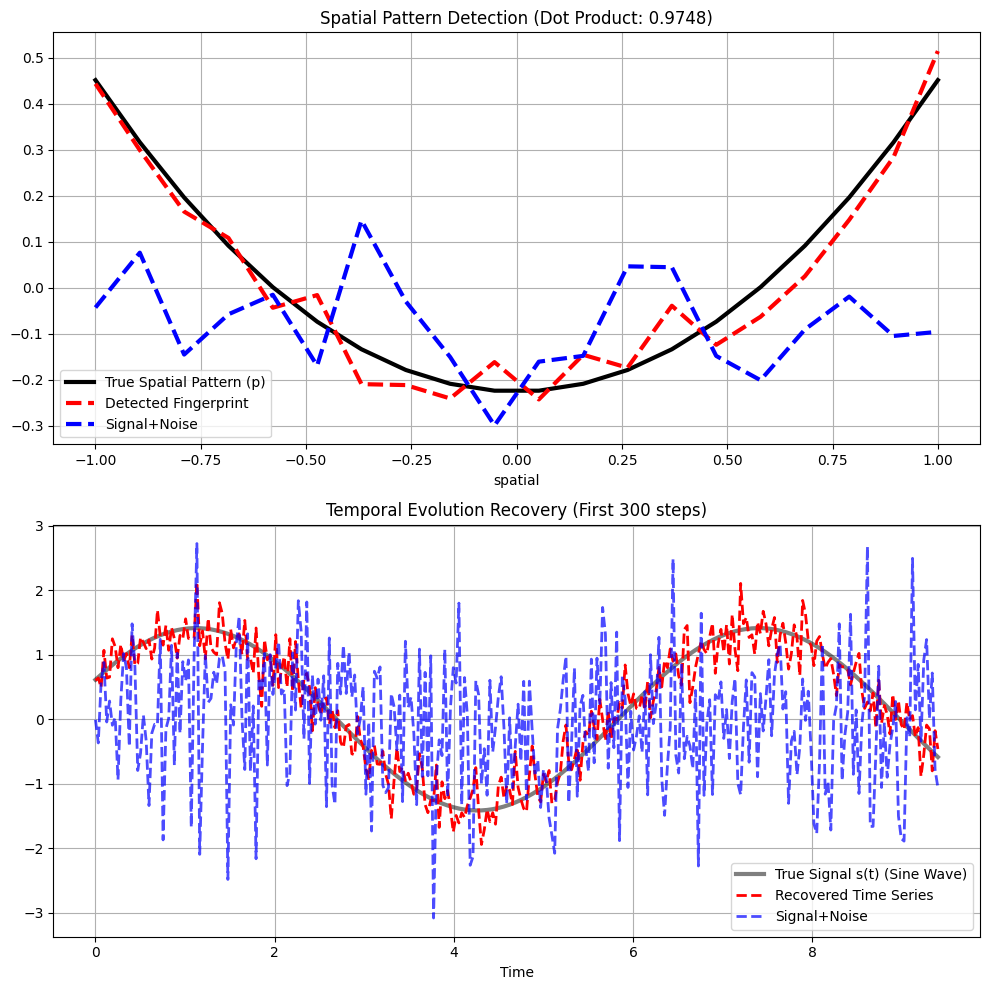

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, eig

# 設定隨機種子
np.random.seed(666)

# ==========================================
# 1. 建立 Toy Model 參數
# ==========================================
N = 20    # 空間點 (例如緯度)
T = 1000  # 時間點

# --- 定義空間模式 p (保持原本的拋物線，作為對照) ---
x_axis = np.linspace(-1, 1, N)
true_p = 0.5 * (3 * x_axis**2 - 1)
true_p = true_p / np.linalg.norm(true_p) # 正規化

# --- 【關鍵修改】定義週期性時間信號 s(t) ---
# 模擬 5 個完整的週期循環 (類似 5 次聖嬰現象)
time_steps = np.linspace(0, 10 * np.pi, T)
s_t = 3.0 * np.sin(time_steps+np.pi/7) # 振幅設為 3.0

# ==========================================
# 2. 生成數據
# ==========================================
# --- 生成對照組 x_ctrl (有空間結構的噪音) ---
# 製造一個隨機的相關矩陣 M
M = np.random.randn(N, N)
# x_ctrl = M * White_Noise
x_ctrl = M @ np.random.randn(N, T)

# --- 生成實驗組 x_exp ---
# 背景噪音
noise_exp = M @ np.random.randn(N, T)
# 信號矩陣 = 空間 p * 時間 s(t)
signal_matrix = np.outer(true_p, s_t)
# 實驗數據
x_exp = noise_exp + signal_matrix
print(x_exp.shape)
# ==========================================
# 3. 執行指紋法
# ==========================================
# 計算共變異數矩陣
C_ctrl = np.cov(x_ctrl)
C_exp = np.cov(x_exp)

# 計算指紋矩陣 S = C_exp * C_ctrl^(-1)
# 加上一個極小值 (regularization) 確保數值穩定
S = C_exp @ inv(C_ctrl + 1e-5 * np.eye(N))

# 特徵值分解
w, v = eig(S)

# 找出最大特徵值對應的向量
idx = np.argsort(w)[-1] # 最大值的 index
estimated_fingerprint = np.real(v[:, idx])

# 修正方向 (如果算反了就轉回來)
if np.dot(estimated_fingerprint, true_p) < 0:
    estimated_fingerprint = -estimated_fingerprint

# 正規化
estimated_fingerprint = estimated_fingerprint / np.linalg.norm(estimated_fingerprint)

# ==========================================
# 4. 驗證結果：投影回時間序列
# ==========================================
# 我們已經抓出了空間指紋 (estimated_fingerprint)
# 現在把實驗數據投影到這個指紋上，看看能不能還原出 s(t) (正弦波)
# Projection: z(t) = p_est^T * C_ctrl^(-1) * x_exp(t)
# (這是指紋法中計算檢測變數的標準公式，相當於加權平均)
weights = inv(C_ctrl) @ estimated_fingerprint
detected_time_series = weights @ x_exp

# 為了畫圖比較，將偵測到的時間序列標準化
detected_time_series = detected_time_series / np.std(detected_time_series)
original_s_t_norm = s_t / np.std(s_t)

# ==========================================
# 5. 畫圖
# ==========================================
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# 圖 1: 空間模式比較
ax[0].plot(x_axis, true_p, 'k-', linewidth=3, label='True Spatial Pattern (p)')
ax[0].plot(x_axis, estimated_fingerprint, 'r--', linewidth=3, label='Detected Fingerprint')
ax[0].plot(x_axis, np.mean(x_exp,1), 'b--', linewidth=3, label='Signal+Noise')

ax[0].set_xlabel('spatial')
ax[0].set_title(f'Spatial Pattern Detection (Dot Product: {np.dot(true_p, estimated_fingerprint):.4f})')
ax[0].legend()
ax[0].grid(True)

# 圖 2: 時間序列還原
# 只畫前 200 個點以免太密
f_point = 300
ax[1].plot(time_steps[:f_point], original_s_t_norm[:f_point], 'k-', alpha=0.5, linewidth=3, label='True Signal s(t) (Sine Wave)')
ax[1].plot(time_steps[:f_point], detected_time_series[:f_point], 'r--', linewidth=2, label='Recovered Time Series')
ax[1].plot(time_steps[:f_point], np.mean(x_exp,0)[:f_point], 'b--', linewidth=2, label='Signal+Noise',alpha=0.7)
ax[1].set_title(f'Temporal Evolution Recovery (First {f_point} steps)')
ax[1].set_xlabel('Time')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.savefig("pic/Q1.png")
plt.show()